<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3 Linear Regression



---



Key Concepts:


*   QR Decomposition
*   Least-Squares Problems
*   Linear Regression





#### Set up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



---



###QR Decomposition

QR decomposition is used to solve linear least squares problems. It is a decomposition of matrix $A$ into product $A=QR$ where $Q$ is an orthonormal matrix ($Q ^T = Q ^{-1}$) and R is an upper triangular matrix.

$Q = [e _1 ... e _k ]$

$R = Q ^T A$




In [19]:
# Matrix A
A = np.array([[1, 1, 0],
              [1, 0, 1],
              [0, 1, 1]])
# QR decomposition using Gram-Schmidt process
def gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]

        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

Q, R = gram_schmidt(A)
Q_rounded = np.round(Q, decimals=2)
R_rounded = np.round(R, decimals=2)

# Print
print("Matrix A:\n", A)
print("Matrix Q (Orthonormal):\n", Q_rounded)
print("Matrix R (Upper Triangular):\n", R_rounded)


Matrix A:
 [[1 1 0]
 [1 0 1]
 [0 1 1]]
Matrix Q (Orthonormal):
 [[ 0.71  0.41 -0.58]
 [ 0.71 -0.41  0.58]
 [ 0.    0.82  0.58]]
Matrix R (Upper Triangular):
 [[1.41 0.71 0.71]
 [0.   1.22 0.41]
 [0.   0.   1.15]]


Now we can verify that $QQ^T=I$ and that $A=QR$

In [21]:
def verify_orthonormal(Q):
    i_approx = np.dot(Q, Q.T)
    i = np.eye(Q.shape[0])

    i_approx_rounded = np.round(i_approx, decimals=2)

    print("QQ^T:\n", i_approx_rounded)

    # Check result is close to identity matrix
    is_orthonormal = np.allclose(i_approx, i, atol=1e-6)

    if is_orthonormal:
        print("Q is orthonormal.\n")
    else:
        print("Q is not orthonormal.\n")


def verify_A_QR(A, Q, R):
    A_approx = np.dot(Q, R)
    A_approx_rounded = np.round(A_approx, decimals=2)

    print("A:\n", A)
    print("QR:\n", A_approx_rounded)

    # Check if A is close to QR
    is_decomposition_correct = np.allclose(A, A_approx, atol=1e-6)

    if is_decomposition_correct:
        print("QR decomposition is correct: A = QR.")
    else:
        print("QR decomposition is not correct: A != QR.")


# Verifying that Q is orthonormal
verify_orthonormal(Q)

print("-------------------------\n")

# Verifying that A = QR
verify_A_QR(A, Q, R)


QQ^T:
 [[ 1. -0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]
Q is orthonormal.

-------------------------

A:
 [[1 1 0]
 [1 0 1]
 [0 1 1]]
QR:
 [[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
QR decomposition is correct: A = QR.


###Least Squares Problem

Let $A \in \mathbb{R}^{n \times m}$ be an $n \times m$ matrix, where $n>m$, and $b \in \mathbb{R}^n$ be a vector. We try to solve the system $Ax = b$, which is often inconsistent. We are looking to use $Ax$ to approximate $b$.

We can use the least squares problem, using the normal equations:

$$\min_{x \in \mathbb{R}^m} \|Ax - b\|$$


$$A^TA\textbf{x}=A^T\textbf{b}$$


###Linear Regression

Given input data points, linear regression aims to find a function that fits the data. The common approach involves finding coefficients $\beta_j$'s that minimize the criterion

$$
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where

$$
\hat{y}_i = \beta_0 + \sum_{j=1}^{d} \beta_j x_{ij}
$$


The linear regression model can be depicted from:

**Linear:** $y= \beta _0 + \beta _1 \cdot x $

**Slope:** $\beta _1 = \frac{\sum (x _i -\bar x)(y _i - \bar y)}{\sum (x _i - \bar x) ^2}$

**Intercept:** $\beta _0 = \bar y - \beta _1 \bar x$

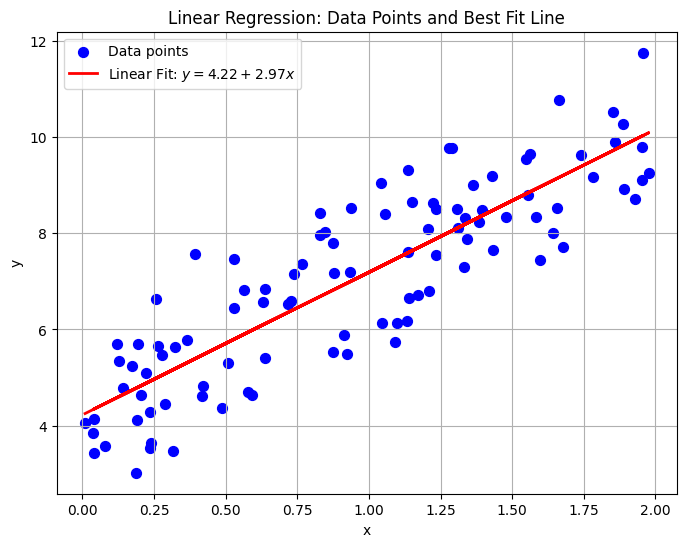

Slope (beta_1): 2.968467510701019
Intercept (beta_0): 4.222151077447231


In [26]:
# Generate random data points
np.random.seed(0)
n = 100
x = 2 * np.random.rand(n)
y = 4 + 3 * x + np.random.randn(n)

# Coefficients for linear regression
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate values for slope (beta_1)
xx_val = np.sum((x - x_mean)**2)
xy_val = np.sum((x - x_mean) * (y - y_mean))

# Slope
beta_1 = xy_val / xx_val

# Intercept
beta_0 = y_mean - beta_1 * x_mean

# Predicted values
y_pred = beta_0 + beta_1 * x

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points', s=50)
plt.plot(x, y_pred, color='red', label=f'Linear Fit: $y = {beta_0:.2f} + {beta_1:.2f}x$', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Data Points and Best Fit Line')
plt.legend()
plt.grid(True)

plt.show()

# Print
print(f"Slope (beta_1): {beta_1}")
print(f"Intercept (beta_0): {beta_0}")
